# Assignment_4_Linear Regression(1)

In [ ]:
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model 
using R or Python.

In [12]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Acquire the data

In [2]:
ds = pd.read_csv('delivery_time.csv')
ds.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Preprocess the data

In [3]:
ds.shape

(21, 2)

In [4]:
ds.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
ds.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
ds.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

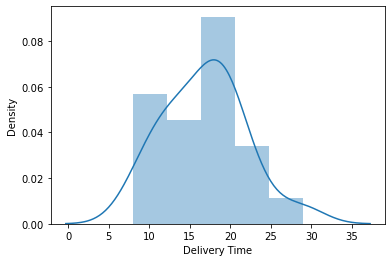

In [14]:
sns.distplot(ds['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

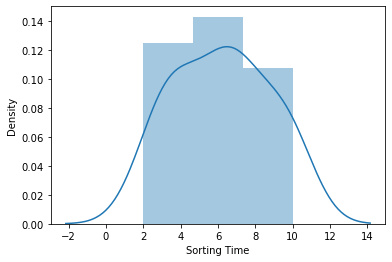

In [15]:
sns.distplot(ds['Sorting Time'])

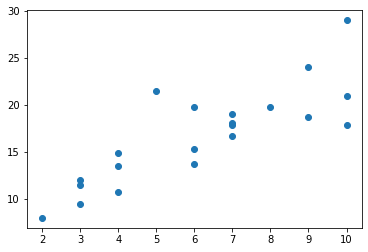

In [16]:
plt.scatter(ds['Sorting Time'],ds['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

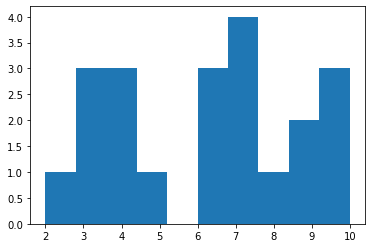

In [17]:
plt.hist(ds['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3f58d5c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3f58e73a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3f58d58b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3f58e7ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3f58e7e50>],
 'means': []}

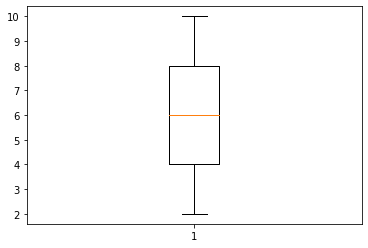

In [18]:
plt.boxplot(ds['Sorting Time'])

In [19]:
ds.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

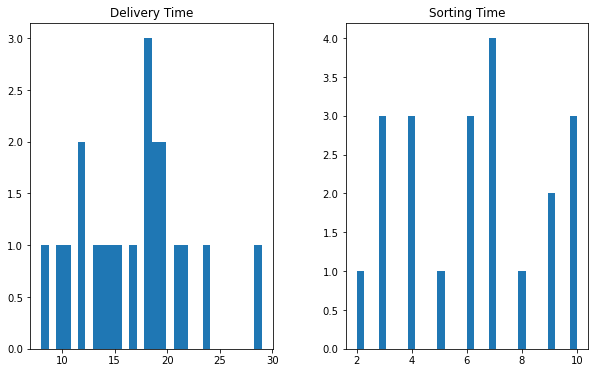

In [20]:
ds.hist(grid=False,
       figsize=(10, 6),
       bins=30)

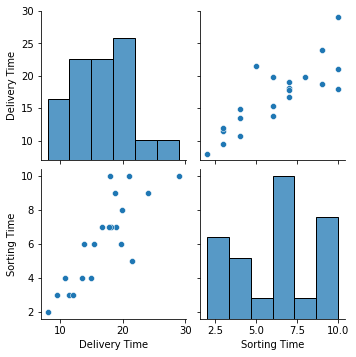

In [21]:
sns.pairplot(ds)

In [22]:
ds.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Delivery Time,0.352390,0.317960
Sorting Time,0.047115,-1.148455


In [23]:
ds=ds.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
ds

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
x = ds[['Sorting_Time']]
y = ds[['Delivery_Time']]

# Train the model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

# Test the Model

In [27]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator=model, X=x, y=y, cv=4)
print("CV score is for LR model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score,cv_score.mean(),cv_score.std()))

CV score is for LR model = [0.40800127 0.06478567 0.54132932 0.47630451]
 mean accuracy = 0.37260519009570275
 std dev  = 0.18386620322788563


In [28]:
print(" Intercept value of Model is " ,model.intercept_)
print("Coefficient value of Model is ", model.coef_)

 Intercept value of Model is  [6.58273397]
Coefficient value of Model is  [[1.6490199]]


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

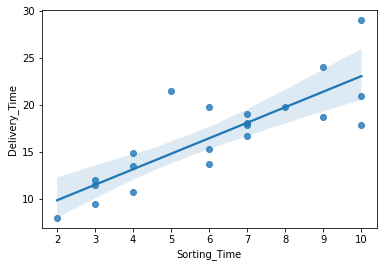

In [29]:
import seaborn as sns
sns.regplot(x='Sorting_Time',y='Delivery_Time', data=ds)

In [30]:
# using training data
y_predict_train_le = model.predict(x)

# using test data
# Linear Regressor
test_data = pd.DataFrame({'Test Sorting Time': [0,2,4,6,7,8,9,10,12,15,19]})
y_predict_test_le = model.predict(test_data)
test_data['Predicted Delivery Time']= y_predict_test_le

predicted_ds =  pd.DataFrame({'Test Sorting Time': [0,2,4,6,7,8,9,10,12,15,19]})
predicted_ds['Pred DT LR'] = y_predict_test_le

print(predicted_ds)

    Test Sorting Time  Pred DT LR
0                   0    6.582734
1                   2    9.880774
2                   4   13.178814
3                   6   16.476853
4                   7   18.125873
5                   8   19.774893
6                   9   21.423913
7                  10   23.072933
8                  12   26.370973
9                  15   31.318032
10                 19   37.914112


In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [32]:
print("REGRESSOR MODEL")
print("MSE      = ",round(mean_squared_error(y,y_predict_train_le),2))
print("R2 score =",round(r2_score(y,y_predict_train_le),2))
print("MAE      =",round(mean_absolute_error(y,y_predict_train_le),2))

REGRESSOR MODEL
MSE      =  7.79
R2 score = 0.68
MAE      = 2.09


## Model Predictions

In [33]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [34]:
new_data=pd.Series([6,9])
new_data

0    6
1    9
dtype: int64

In [35]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [36]:
model.predict(data_pred)

array([[16.47685335],
       [21.42391304]])

# Logrithm Transformation

In [37]:
X_log = np.log(ds['Sorting_Time'].values.reshape(-1,1))

y_log = ds['Delivery_Time'].values.reshape(-1,1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [40]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [41]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [-0.31865575]
Co-efficient Value of Log Model is :  [[10.09551654]]


In [42]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[22.92713014],
       [19.32631235],
       [13.6767019 ],
       [13.6767019 ],
       [22.92713014]])

In [43]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,21.00,22.927130
1,18.11,19.326312
2,14.88,13.676702
3,13.50,13.676702
4,17.90,22.927130


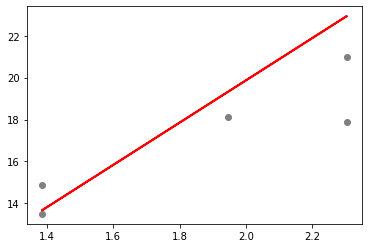

In [44]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

In [45]:
from sklearn import metrics

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 1.910114526185978
Mean Squared Error: 6.388886730349971
Root Mean Squared Error: 2.5276247210276233
R^2 Score :           0.08089653229737481


# Exponential Transformation Model

In [47]:
# Input dataset
X_e_log = ds['Sorting_Time'].values.reshape(-1,1)

# Output or Predicted Value of data
y_e_log = np.log(ds['Delivery_Time'].values.reshape(-1,1))

In [48]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [49]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [50]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [1.9917351]
 Exponent model Coefficient value is  [[0.12920274]]


In [51]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[3.28376247],
       [2.89615425],
       [2.50854604],
       [2.50854604],
       [3.28376247]])

In [52]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,3.044522,3.283762
1,2.896464,2.896154
2,2.700018,2.508546
3,2.602690,2.508546
4,2.884801,3.283762


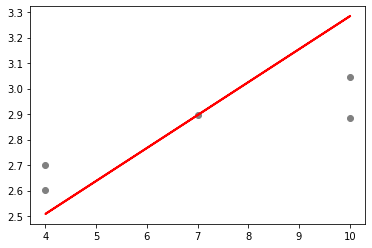

In [53]:
plt.scatter(X_test_exp, Y_test_exp,  color='gray')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))

Mean Absolute Error: 0.18482548465812493
Mean Squared Error: 0.052386182564572156
Root Mean Squared Error: 0.22888027998185462
R^2 Score :           -1.1485016492474158


# Quadratic Transformation Model

In [55]:
ds['Square_S_Time'] = ds.apply(lambda row: row.Sorting_Time**2, axis =1 )

In [56]:
ds

,Delivery_Time,Sorting_Time,Square_S_Time
0,21.00,10,100.0
1,13.50,4,16.0
2,19.75,6,36.0
3,24.00,9,81.0
4,29.00,10,100.0
5,15.35,6,36.0
6,19.00,7,49.0
7,9.50,3,9.0
8,17.90,10,100.0
9,18.75,9,81.0


In [57]:
X_q = ds.iloc[:,ds.columns != 'Delivery_Time']
Y_q = ds.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

0     10
17     7
15     4
1      4
8     10
Name: Sorting_Time, dtype: int64


In [58]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [59]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  3.552713678800501e-15
                Coefficient
Sorting_Time   1.000000e+00
Square_S_Time  6.395126e-17


In [60]:
y_pred_q_q = model.predict(X_test)

In [61]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
0,10,10.0
17,7,7.0
15,4,4.0
1,4,4.0
8,10,10.0


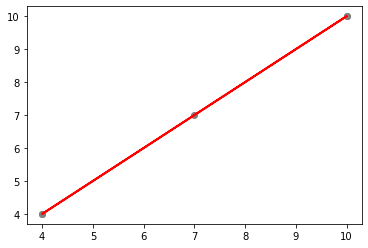

In [62]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))

Mean Absolute Error: 1.7763568394002506e-16
Mean Squared Error: 1.5777218104420237e-31
Root Mean Squared Error: 3.9720546451956367e-16
R^2 Score :           1.0


# Polynomial Transformation Model

In [64]:
ds['Cube_S_Time'] = ds.apply(lambda row: row.Sorting_Time**3, axis =1 )
ds

,Delivery_Time,Sorting_Time,Square_S_Time,Cube_S_Time
0,21.00,10,100.0,1000.0
1,13.50,4,16.0,64.0
2,19.75,6,36.0,216.0
3,24.00,9,81.0,729.0
4,29.00,10,100.0,1000.0
5,15.35,6,36.0,216.0
6,19.00,7,49.0,343.0
7,9.50,3,9.0,27.0
8,17.90,10,100.0,1000.0
9,18.75,9,81.0,729.0


In [65]:
X_c = ds.iloc[:,ds.columns != 'Deliver_Time']
Y_c = ds.iloc[:,1]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)
print(Y_test)

0     10
17     7
15     4
1      4
8     10
Name: Sorting_Time, dtype: int64


In [66]:
cube_model = LinearRegression()
cube_model.fit(X_train_c, Y_train_c)

LinearRegression()

In [67]:
print(" Intercept value of Cubic Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X_c.columns, columns=['Coefficient'])
print(coeff_df)

 Intercept value of Cubic Model is  -3.703704010149522e-13
                Coefficient
Delivery_Time  2.538562e-14
Sorting_Time   1.000000e+00
Square_S_Time  2.830718e-15
Cube_S_Time   -3.678917e-17


In [68]:
y_pred_cube = cube_model.predict(X_test_c)

In [69]:
df_33 = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_cube})
df_33.head()

,Actual,Predicted
0,10,10.0
17,7,7.0
15,4,4.0
1,4,4.0
8,10,10.0


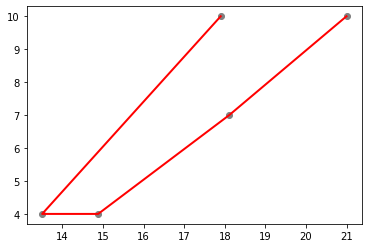

In [70]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_cube, color='red', linewidth=2)
plt.show()

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_c, y_pred_cube))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_c, y_pred_cube) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred_cube)))
print("R^2 Score :          ", metrics.r2_score(Y_test_c, y_pred_cube))

Mean Absolute Error: 7.65609797781508e-14
Mean Squared Error: 7.306903020700144e-27
Root Mean Squared Error: 8.548042478076571e-14
R^2 Score :           1.0


## Log Transformation of X

In [80]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [83]:
df=df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [89]:
x_logt = np.log(ds['Sorting_Time'])
y=df[['Delivery_Time']]

In [91]:
import statsmodels.api as sm

In [92]:
lin_reg_model = sm.OLS(y,x_logt).fit()
predictions= lin_reg_model.predict(x_logt)

In [93]:
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    1.48e-17
Time:                        20:17:49   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation of Y

In [96]:
y_logt = np.log(df['Delivery_Time'])

In [97]:
lin_reg_model2 = sm.OLS(y_logt,x).fit()
predictions2 = lin_reg_model2.predict(x)

In [98]:
lin_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    3.00e-12
Time:                        20:19:53   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation of x and y

In [99]:
lin_reg_model3 = sm.OLS(y_logt,x_logt).fit()
predictions3 = lin_reg_model3.predict(x_logt)

In [100]:
lin_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    5.72e-17
Time:                        20:20:56   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square root transformation of x

In [102]:
x_sqrt = np.sqrt(df['Sorting_Time'])

In [103]:
lin_reg_model4 = sm.OLS(y,x_sqrt).fit()
predictions4 = lin_reg_model4.predict(x_sqrt)

In [104]:
lin_reg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    1.88e-17
Time:                        20:22:39   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square root transformation of y

In [105]:
y_sqrt = np.sqrt(df['Delivery_Time'])

In [106]:
lin_reg_model5 = sm.OLS(y_sqrt,x).fit()
predictions5 = lin_reg_model5.predict(x)

In [107]:
lin_reg_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    5.09e-13
Time:                        20:24:25   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Sqrt Transformation of x and y

In [108]:
lin_reg_model6 = sm.OLS(y_sqrt,x_sqrt).fit()
predictions6 = lin_reg_model6.predict(x_sqrt)

In [109]:
lin_reg_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    2.10e-20
Time:                        20:25:51   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
lin_reg_model6.pvalues

Sorting_Time    2.100766e-20
dtype: float64

In [111]:
new_data= pd.Series([3,8])
new_data

0    3
1    8
dtype: int64

In [112]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,3
1,8


In [113]:
lin_reg_model6.predict(data_pred)

0     4.909060
1    13.090827
dtype: float64